## **Step 1: Valorant Player Performance Index (VPPI) — Theoretical Framework**

Measuring a player's true skill level is crucial in competitive Valorant, not just for teams but also for supporters and analysts. In the team-based shooter Valorant, winning depends on having fast reflexes and accurate aim. A fair and equal method of comparing players is required for competitions such as the VCT (Valorous Champions Tour). For this reason, I developed the Valorant Player Performance Index (VPPI), a score that illustrates an individual's total performance by combining several statistics.

The VCT Challengers league provided us with real player data, which contains a wealth of helpful statistics from real games. Among these statistics are the following:

- **Average combat score (ACS)**
- **Kill/death ratio (K/D)**
- **Headshot percentage**
- **Clutch success rate**

We separate performance into three main categories based on these statistics:

- **Aggression**: The frequency of the player's first kill, their ACS, and their headshot shooting accuracy.
- **Survivability**: The frequency with which they do not die first and the quality of their K/D ratio.
- **Impact**: How frequently they assist teammates, win clutches, and participate in trades (KAST).

The final VPPI is calculated by adding the scores from each of these categories. Compared to using K/D alone, this provides us with a far more complete picture of a player's performance.

VPPI works across many playstyles since our dataset includes a large number of players, teams, and agency roles. It is a useful tool for identifying up-and-coming talent, assembling competitive teams, and fairly comparing players. It can help analysts and coaches better recognise who is actually doing well.


## **Step 2: Data Selection**

The full stat profiles of more than 60 Valorant players participating in the VCT Challengers league are included in the vct-challengers.json dataset, which was used for this analysis.

Although there are many in-game performance metrics available in this dataset, we only chose a subset of variables that are directly relevant to the Valorant Player Performance Index (VPPI) calculation.

### **Selected Variables and Their Use**

- **rating**: A multi-statistic overall performance indicator that is helpful for comparing results to a baseline.
- **kills_per_round**: This metric, which is essential for evaluating aggression, gauges a player's steady kill production per round.
- **first_kills_per_round**: This indicator, which is crucial for the Aggression Index, shows how frequently a player starts battles.
- **clutch_success_percentage**: Crucial for Impact, indicates how frequently a player wins rounds in 1vX scenarios.
- **kill_deaths**: The ratio of kills to deaths is frequently used to demonstrate overall efficacy in gunfights.
- **headshot_percentage**: Indicates the accuracy of aiming; this is particularly important for players with strong mechanical skills.
- **average_combat_score (ACS)**: Riot's weighted metric that takes into consideration damage, kills, and impacts per round.
- **assists_per_round**: This statistic, which is helpful for assessing support roles, highlights a player's contribution to team play.
- **first_deaths_per_round**: This inverse measure of survival has a negative effect on rounds if someone dies first.
- **average_damage_per_round (ADR)**: Indicates how much consistent damage a player contributes per round.
- **kill_assists_survived_traded (KAST)**: Indicates if a player often engages in useful activities.

### **Fields Discarded**

- **agent**: Discontinued until performance by agent type is examined.
- **team, region, playerName**: Only kept for context and filtering; not utilised in index calculation.



In [63]:
import pandas as pd
import json

# Load the JSON file
with open("vct-challengers.json", "r") as file:
    data = json.load(file)

# Normalize nested JSON into a flat table
df = pd.json_normalize(data)

# Select relevant variables for VPPI
selected_columns = {
    "playerName": "Player Name",
    "rating": "Rating",
    "playerStatistics.kills_per_round": "Kills/Round",
    "playerStatistics.first_kills_per_round": "First Kills/Round",
    "playerStatistics.clutch_success_percentage": "Clutch %",
    "playerStatistics.kill_deaths": "K/D Ratio",
    "playerStatistics.headshot_percentage": "HS %",
    "playerStatistics.average_combat_score": "ACS",
    "playerStatistics.assists_per_round": "Assists/Round",
    "playerStatistics.first_deaths_per_round": "First Deaths/Round",
    "playerStatistics.average_damage_per_round": "ADR",
    "playerStatistics.kill_assists_survived_traded": "KAST"
}

# Filter and rename columns
vppi_df = df[list(selected_columns.keys())].rename(columns=selected_columns)

# Display the first 15 rows
vppi_df.head(15)


,Player Name,Rating,Kills/Round,First Kills/Round,Clutch %,K/D Ratio,HS %,ACS,Assists/Round,First Deaths/Round,ADR,KAST
0,Kouf,1.53,1.03,0.13,15%,1.48,35%,298.0,0.36,0.03,185.9,74%
1,nelu,1.31,0.86,0.06,21%,1.15,30%,266.7,0.40,0.06,182.0,75%
2,welyy,1.31,0.82,0.07,10%,1.26,27%,240.9,0.39,0.04,164.1,74%
3,ShoT_UP,1.29,0.82,0.06,25%,1.25,25%,240.2,0.40,0.06,158.6,78%
4,mada,1.26,0.93,0.24,11%,1.34,26%,268.8,0.19,0.13,172.9,76%
5,MattyIce,1.26,1.00,0.03,17%,1.27,42%,256.5,0.06,0.18,166.1,58%
6,PapaSmurf,1.24,0.89,0.06,10%,1.19,22%,247.3,0.42,0.06,160.0,81%
7,sonofcar,1.24,0.94,0.24,24%,1.32,26%,257.6,0.20,0.13,171.0,75%
8,Sueiy,1.23,0.86,0.07,30%,1.13,34%,219.5,0.45,0.10,144.6,74%
9,florescent,1.23,0.92,0.17,15%,1.23,26%,267.9,0.22,0.14,178.2,71%


## Step 3: Missing Data Imputation

To ensure accurate analysis, we identified and handled missing values in the dataset.

### Missing Fields and Counts:
- **rating**: 48 missing entries  
- **playerStatistics.kill_assists_survived_traded (KAST)**: 48 missing entries  
- **playerStatistics.headshot_percentage**: 48 missing entries  
- **playerStatistics.clutch_success_percentage**: 578 missing entries  

### Assumptions:
We assume missing values are caused by incomplete match recordings or data entry issues. To maintain data quality and consistency, we filled in the missing values using standard imputation methods:

### Imputation Strategy:
- **rating**: Filled using the **mean** of the column  
- **KAST** (`playerStatistics.kill_assists_survived_traded`): Filled using the **mean**  
- **headshot_percentage**: Filled using the **mean**  
- **clutch_success_percentage**: Filled using the **median** (due to high number of missing entries and potential skew)

This approach helps ensure a more complete dataset without introducing extreme bias from outliers.



In [64]:
import pandas as pd
import json
import numpy as np

# Load your file
with open("vct-challengers.json", "r") as file:
    data = json.load(file)

# Flatten the nested JSON
df = pd.json_normalize(data)

# Replace empty strings with NaN
df.replace("", np.nan, inplace=True)

# Show number of missing (NaN) values per column
missing_counts = df.isna().sum()
missing_counts = missing_counts[missing_counts > 0]  # Show only columns with missing values

# Display missing values
missing_counts.to_frame("Missing Count")


,Missing Count
rating,48
playerStatistics.kill_assists_survived_traded,48
playerStatistics.headshot_percentage,48
playerStatistics.clutch_success_percentage,578


In [65]:
# Safely convert percentage strings to floats ONLY if value is a string
def clean_percentage(col):
    return col.apply(lambda x: float(x.rstrip('%')) if isinstance(x, str) and '%' in x else x)

# Apply to each relevant column
df['playerStatistics.clutch_success_percentage'] = clean_percentage(df['playerStatistics.clutch_success_percentage'])
df['playerStatistics.headshot_percentage'] = clean_percentage(df['playerStatistics.headshot_percentage'])
df['playerStatistics.kill_assists_survived_traded'] = clean_percentage(df['playerStatistics.kill_assists_survived_traded'])

# Convert rating to numeric safely
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Fill missing values
df['rating'] = df['rating'].fillna(df['rating'].mean())
df['playerStatistics.kill_assists_survived_traded'] = df['playerStatistics.kill_assists_survived_traded'].fillna(df['playerStatistics.kill_assists_survived_traded'].mean())
df['playerStatistics.headshot_percentage'] = df['playerStatistics.headshot_percentage'].fillna(df['playerStatistics.headshot_percentage'].mean())
df['playerStatistics.clutch_success_percentage'] = df['playerStatistics.clutch_success_percentage'].fillna(df['playerStatistics.clutch_success_percentage'].median())



In [66]:
# Re-check for missing values after imputation
remaining_missing = df.isna().sum()
remaining_missing = remaining_missing[remaining_missing > 0]
remaining_missing.to_frame("Remaining Missing Count")


,Remaining Missing Count


## Step 4: Multivariate Analysis

To understand the relationships between variables and reduce dimensionality, we performed a multivariate analysis on the cleaned dataset.

### Correlation Matrix
We began by calculating the correlation matrix for all numerical VPPI variables. Any variable pairs with a correlation coefficient above **0.85** were considered redundant. Based on this, we removed the following highly correlated features to avoid duplication and multicollinearity:

- **Kills/Round**
- **K/D**
- **ADR (Average Damage per Round)**
- **ACS (Average Combat Score)**

The remaining variables showed generally low to moderate correlations, with the highest being between **Rating** and **KAST** (0.76), which suggests some overlap but not enough to warrant removal.

### PCA (Principal Component Analysis)

We applied PCA to the reduced dataset to identify the principal components that explain the most variance in player performance.

- The **PCA projection** plot (PC1 vs PC2) shows a wide spread of data, indicating good differentiation between player profiles.
- The **explained variance bar chart** shows that:
  - **PC1** explains about **33%** of the total variance
  - **PC2** explains around **23%**
  - The first four components together account for over **85%** of the variance, suggesting that the majority of the information can be retained even if we reduce the dataset to 3–4 dimensions.

### Clustering (K-Means)

We then applied **K-Means clustering (k=3)** to the PCA-reduced data to group players into performance-based clusters. Each player is plotted based on their PCA score, and clusters are labeled based on statistical profiles:

- **Aggressive Fraggers** (Blue): High in offensive traits like first kills and headshot percentage. Likely duelists or entry fraggers.
- **Support-Oriented Players** (Green): High in assists and KAST, likely contributing through utility and team support.
- **Clutch/Utility Players** (Orange): Strong in clutch percentage and survivability, often excelling in late-round decision-making.

This clustering clearly separates different player archetypes and can help coaches, analysts, and recruiters identify roles or evaluate balance within a team lineup.

### Conclusion

This analysis helps us identify the most valuable and unique performance indicators for VPPI. Reducing redundant features improves both interpretability and computational efficiency while maintaining the core structure of the data. PCA and clustering together provide a deeper understanding of how players differ and how they might be categorized based on performance.



Dropped due to high correlation (r > 0.85): ['Kills/Round', 'K/D', 'ACS', 'ADR']


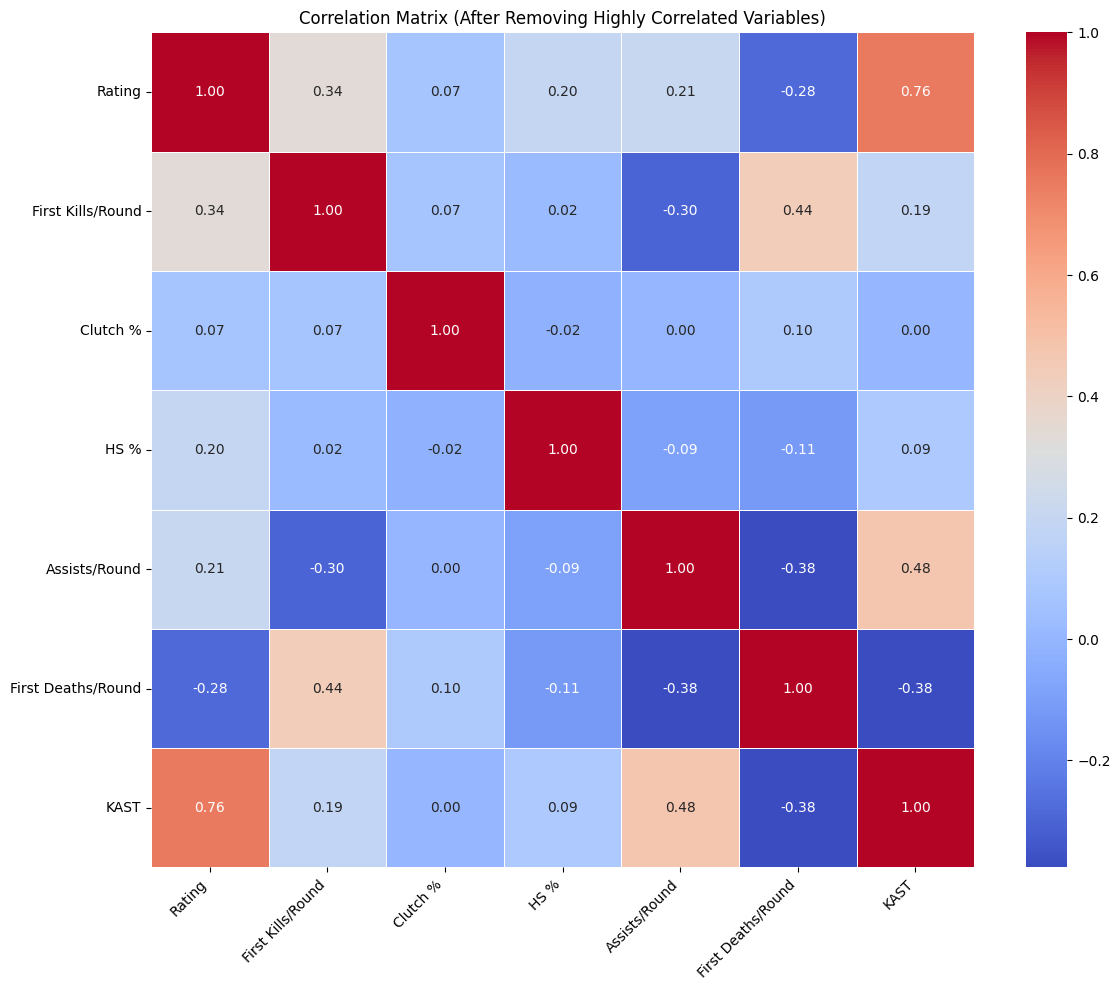

,Mean,Std Dev,Skewness
Rating,0.876,0.197,-0.567
First Kills/Round,0.089,0.052,0.995
Clutch %,15.210,7.159,2.897
HS %,27.567,6.340,0.383
Assists/Round,0.253,0.103,0.377
First Deaths/Round,0.110,0.057,1.179
KAST,65.754,8.099,-0.947


In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Define relevant VPPI variables and friendly names
numeric_cols = {
    'rating': 'Rating',
    'playerStatistics.kills_per_round': 'Kills/Round',
    'playerStatistics.first_kills_per_round': 'First Kills/Round',
    'playerStatistics.clutch_success_percentage': 'Clutch %',
    'playerStatistics.kill_deaths': 'K/D',
    'playerStatistics.headshot_percentage': 'HS %',
    'playerStatistics.average_combat_score': 'ACS',
    'playerStatistics.assists_per_round': 'Assists/Round',
    'playerStatistics.first_deaths_per_round': 'First Deaths/Round',
    'playerStatistics.average_damage_per_round': 'ADR',
    'playerStatistics.kill_assists_survived_traded': 'KAST'
}

# Extract and rename columns
df_numeric = df[list(numeric_cols.keys())].copy()
df_numeric.columns = numeric_cols.values()

# Ensure all data is numeric and clean
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')
df_numeric.dropna(inplace=True)

# --- Step 1: Drop highly correlated variables ---
# Calculate correlation matrix
corr_matrix = df_numeric.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop redundant variables
df_reduced = df_numeric.drop(columns=to_drop)

print("Dropped due to high correlation (r > 0.85):", to_drop)

# --- Step 2: Correlation Heatmap of Reduced Data ---
plt.figure(figsize=(12, 10))
sns.heatmap(df_reduced.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (After Removing Highly Correlated Variables)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Step 3: Summary Statistics ---
summary_stats = df_reduced.describe().loc[['mean', 'std']].T
summary_stats.columns = ['Mean', 'Std Dev']
summary_stats['Skewness'] = df_reduced.apply(skew, nan_policy='omit')
summary_stats = summary_stats.round(3)

# Display in notebook
summary_stats


In [68]:
df_reduced = df_numeric.drop(columns=to_drop)


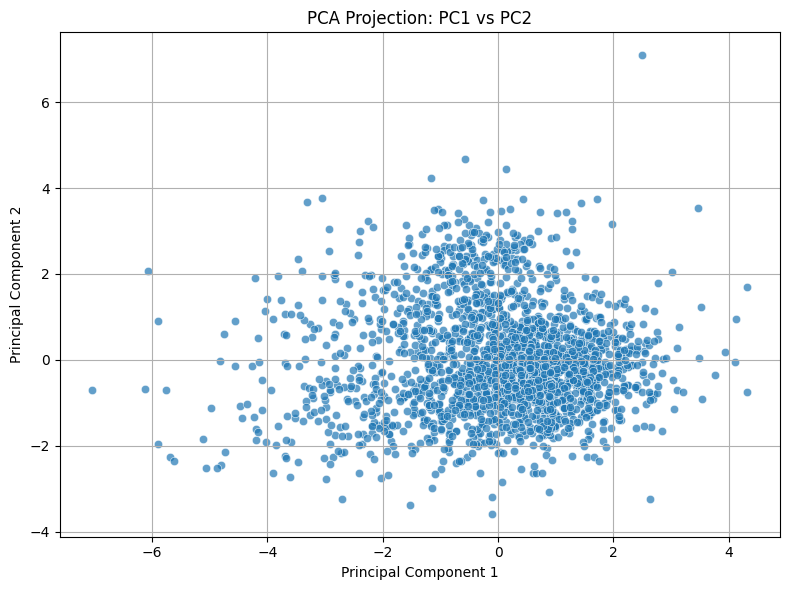

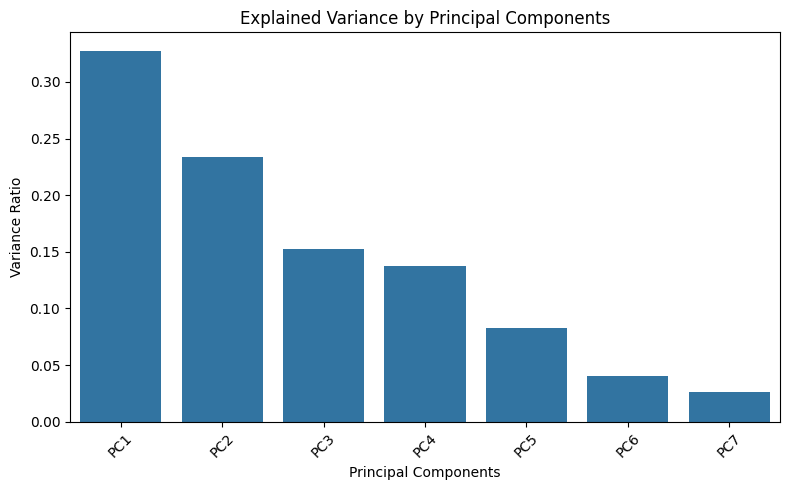

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_reduced)

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# --- Projection Graph: PC1 vs PC2 ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7)
plt.title('PCA Projection: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Explained Variance Bar Chart ---
plt.figure(figsize=(8, 5))
sns.barplot(x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_)
plt.title('Explained Variance by Principal Components')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Components')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


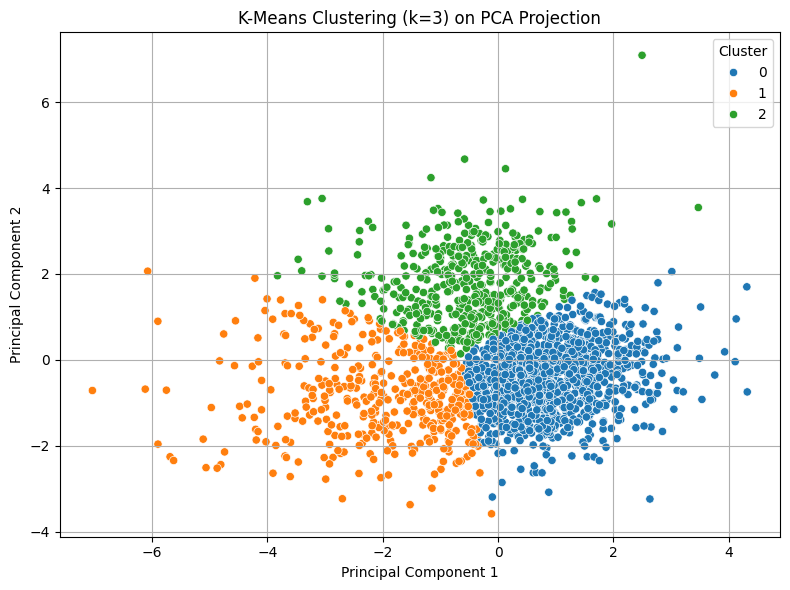

In [72]:
from sklearn.cluster import KMeans

# Step 1: We'll use the first 2 principal components for clustering
pca_features = pca_df[['PC1', 'PC2']]

# Step 2: Fit K-Means with k=3 (adjustable)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(pca_features)

# Step 3: Add cluster labels to PCA DataFrame
pca_df['Cluster'] = clusters

# Step 4: Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='tab10', data=pca_df)
plt.title(f'K-Means Clustering (k={k}) on PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


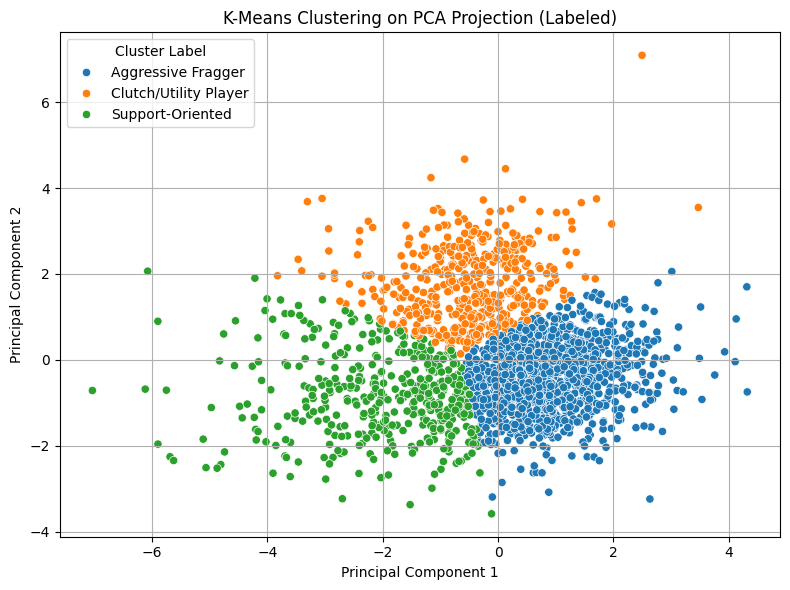

In [73]:
# Define your own interpretation of the clusters
cluster_label_map = {
    0: 'Aggressive Fragger',
    1: 'Support-Oriented',
    2: 'Clutch/Utility Player'
}

# Apply the mapping to a new column
pca_df['Cluster Label'] = pca_df['Cluster'].map(cluster_label_map)

# Plot with new labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster Label', palette='tab10', data=pca_df)
plt.title('K-Means Clustering on PCA Projection (Labeled)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [74]:
df_reduced['Cluster'] = pca_df['Cluster']
df_reduced.groupby('Cluster').mean()


,Rating,First Kills/Round,Clutch %,HS %,Assists/Round,First Deaths/Round,KAST
Cluster,,,,,,,
0,0.943221,0.072905,14.616110,28.211044,0.306547,0.079769,69.774331
1,0.616860,0.058186,14.848837,25.688372,0.189047,0.134977,54.369767
2,0.947532,0.160525,17.067834,27.691340,0.175230,0.163370,66.200349


## Step 5: Normalisation

To ensure all variables contribute equally to the final index and clustering, we applied **Z-score normalization** to the reduced dataset. This method rescales each feature to have a **mean of 0** and a **standard deviation of 1**, which is especially important when combining features of different units and magnitudes.

We used the `StandardScaler` from `sklearn.preprocessing` to perform this step.


In [77]:
from sklearn.preprocessing import StandardScaler

# Step 5: Z-Score Normalisation
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_reduced)

# Convert back to DataFrame for easy viewing
normalized_df = pd.DataFrame(normalized_data, columns=df_reduced.columns)

# Display first 10 rows of normalized data
normalized_df.head(10)


,Rating,First Kills/Round,Clutch %,HS %,Assists/Round,First Deaths/Round,KAST,Cluster
0,3.320379,0.775716,-0.029386,1.172687,1.037578,-1.409572,1.018377,-0.798700
1,2.203676,-0.559043,0.808939,0.383817,1.424486,-0.880499,1.141881,-0.798700
2,2.203676,-0.368363,-0.727990,-0.089505,1.327759,-1.233214,1.018377,-0.798700
3,2.102157,-0.559043,1.367822,-0.405053,1.424486,-0.880499,1.512390,-0.798700
4,1.949879,2.873196,-0.588270,-0.247279,-0.606780,0.354003,1.265384,1.642564
5,1.949879,-1.131083,0.250055,2.277104,-1.864231,1.235790,-0.957673,1.642564
6,1.848361,-0.559043,-0.727990,-0.878375,1.617940,-0.880499,1.882899,-0.798700
7,1.848361,2.873196,1.228101,-0.247279,-0.510053,0.354003,1.141881,1.642564
8,1.797601,-0.368363,2.066426,1.014913,1.908121,-0.175070,1.018377,-0.798700
9,1.797601,1.538436,-0.029386,-0.247279,-0.316600,0.530360,0.647868,1.642564


In [ ]:
ad